# Megaline#

<b> Project description </b>

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, `Surf` and `Ultimate`. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan brings in more revenue. 

### Table of content

* [Data initial inspection](#first)
* [Preparing the data](#second)
* [Data analysis](#three)
* [Testing hypothesis](#four)
* [Overall conclusion](#five)

 ## <a id='first'></a> Open the data file and study the general information ##

In [99]:
#importing the relevant modules and libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import math
import matplotlib.pyplot as plt

In [100]:
users = pd.read_csv('/datasets/megaline_users.csv')
users.info()
users.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
count,500.000000,500,500,500.000000,500,500,500,34
unique,NaN,458,399,NaN,73,266,2,29
top,NaN,Seymour,Mclean,NaN,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-12,surf,2018-12-18
freq,NaN,3,3,NaN,80,5,339,3
mean,1249.500000,NaN,NaN,45.486000,NaN,NaN,NaN,NaN
std,144.481833,NaN,NaN,16.972269,NaN,NaN,NaN,NaN
min,1000.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN
25%,1124.750000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN
50%,1249.500000,NaN,NaN,46.000000,NaN,NaN,NaN,NaN
75%,1374.250000,NaN,NaN,61.000000,NaN,NaN,NaN,NaN


The dataframe `users` has 8 columns (or variables) and 500 rows (or observations). No columns have missing values. There are mix of data - integers and objects.

In [101]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
calls.info()
calls.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
count,137735,137735.000000,137735,137735.000000
unique,137735,NaN,351,NaN
top,1095_143,NaN,2018-12-27,NaN
freq,1,NaN,1091,NaN
mean,NaN,1247.658046,NaN,6.745927
std,NaN,139.416268,NaN,5.839241
min,NaN,1000.000000,NaN,0.000000
25%,NaN,1128.000000,NaN,1.290000
50%,NaN,1247.000000,NaN,5.980000
75%,NaN,1365.000000,NaN,10.690000


The dataframe `calls` has 4 columns (or variables) and 137735 rows (or observations). No columns have missing values. There are mix of data - integers, objects and floats. 

In [102]:
internet = pd.read_csv('/datasets/megaline_internet.csv')
internet.info()
internet.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
count,104825,104825.000000,104825,104825.000000
unique,104825,NaN,351,NaN
top,1095_143,NaN,2018-12-24,NaN
freq,1,NaN,851,NaN
mean,NaN,1242.496361,NaN,366.713701
std,NaN,142.053913,NaN,277.170542
min,NaN,1000.000000,NaN,0.000000
25%,NaN,1122.000000,NaN,136.080000
50%,NaN,1236.000000,NaN,343.980000
75%,NaN,1367.000000,NaN,554.610000


The dataframe `internet` has 4 columns (or variables) and 104824 rows (or observations). No columns have missing values. There are mix of data - intenegers, obects and floats.

In [103]:
messages = pd.read_csv('/datasets/megaline_messages.csv')
messages.info()
messages.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
count,76051,76051.000000,76051
unique,76051,NaN,351
top,1331_128,NaN,2018-12-28
freq,1,NaN,702
mean,NaN,1245.972768,NaN
std,NaN,139.843635,NaN
min,NaN,1000.000000,NaN
25%,NaN,1123.000000,NaN
50%,NaN,1251.000000,NaN
75%,NaN,1362.000000,NaN


The dataframe `messages` has 3 columns (or variables) and 104824 rows (or observations). No columns have missing values. There are mix of data - intenegers and obects.

In [104]:
plans = pd.read_csv('/datasets/megaline_plans.csv') 
plans.info()
plans.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,surf
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000,NaN
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142,NaN
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000,NaN
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000,NaN
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000,NaN
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000,NaN


The dataframe `plan` has 8 columns (or variables) and 2 rows (or observations). No columns have missing values. There are mix of data - intenegers, floats and objects.

### Conclusion ###

We implemented the libraries and modules that we needed for this project. We also created several datasets. There are no missing data, but there are different data types, that will be converted in the next part of our analysis.

 ## <a id='second'></a>  Prepare the data ##

In [105]:
#Find and eliminate errors in the data
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Column `id` is of a type object, but can not be convereted to integer as it contains `_`. The digits before `_` are the same as i corresponding `user_id`. Therefore, one approach would be to drop the `_` and then we will be able to convert to integer. 

In [106]:
#removing "_"
calls['id'] = calls['id'].str.replace("_","")  
internet['id'] = internet['id'].str.replace("_","")  
messages['id'] = messages['id'].str.replace("_","")  

In [107]:
#Convert the data to the necessary types
calls[["duration"]] = calls[["duration"]].apply(pd.to_numeric, errors='coerce')
calls['call_date'] =  pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

calls.rename(columns={"id": "call_id"}, inplace=True) #changing the name of id as it appears in other dataframes but it refers to something different
calls.head()

,call_id,user_id,call_date,duration
0,100093,1000,2018-12-27,8.52
1,1000145,1000,2018-12-27,13.66
2,1000247,1000,2018-12-27,14.48
3,1000309,1000,2018-12-28,5.76
4,1000380,1000,2018-12-30,4.22


In [108]:
#converting to the datetime type
users['reg_date'] = pd.to_datetime(users['reg_date'])

In [109]:
#checking for missing values
percent= calls.isnull().sum() * 100 / len(calls)
print(round(percent,2))

call_id      0.0
user_id      0.0
call_date    0.0
duration     0.0
dtype: float64


In [110]:
internet.info()
internet[["id", "mb_used"]] = internet[["id", "mb_used"]].apply(pd.to_numeric, errors='coerce')
internet["session_date"] =  pd.to_datetime(internet["session_date"], format='%Y-%m-%d')

internet.rename(columns={"id": "internet_id"}, inplace=True) #changing the name of id as it appears in other dataframes but it refers to something different
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,internet_id,user_id,session_date,mb_used
0,100013,1000,2018-12-29,89.86
1,1000204,1000,2018-12-31,0.00
2,1000379,1000,2018-12-28,660.40
3,1000413,1000,2018-12-26,270.99
4,1000442,1000,2018-12-27,880.22


In [111]:
messages.info()
messages["id"] = messages["id"].apply(pd.to_numeric, errors='coerce')
messages["message_date"] =  pd.to_datetime(messages["message_date"], format='%Y-%m-%d')

messages.rename(columns={"id": "message_id"}, inplace=True) #changing the name of id as it appears in other dataframes but it refers to something different
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,message_id,user_id,message_date
0,1000125,1000,2018-12-27
1,1000160,1000,2018-12-31
2,1000223,1000,2018-12-31
3,1000251,1000,2018-12-27
4,1000255,1000,2018-12-26


In [112]:
plans.rename(columns={"plan_name": "plan"}, inplace=True) #changing the name so it appears the same as in `users` dataframe
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [113]:
# checking for 0 duration
calls['duration'].min()
calls = calls[calls.duration != 0] #removing the 0

Some calls lasted only 0 sec/min which is odd, because a call would not be recored with a id if it did not happen. It can be that it was a mistake when entering the data. We can drop these values, so they do not affect our mean/median values. 

In [114]:
#roudning the seconds to minutes
calls['duration_rounded'] =  np.ceil(calls['duration']).astype(int)
calls.head()

,call_id,user_id,call_date,duration,duration_rounded
0,100093,1000,2018-12-27,8.52,9
1,1000145,1000,2018-12-27,13.66,14
2,1000247,1000,2018-12-27,14.48,15
3,1000309,1000,2018-12-28,5.76,6
4,1000380,1000,2018-12-30,4.22,5


In [115]:
#For each user, find the number of calls and minutes sent per month

calls['month'] = calls['call_date'].dt.month_name() #taking the month only
calls_per_month = calls.groupby(["user_id", "month"]).agg({'call_id': 'count', 'duration_rounded': 'sum',})
calls_per_month.rename(columns={"call_id": "number_of_calls", 'duration_rounded': 'number_of_min'}, inplace=True)
calls_per_month.head()

number_of_calls  number_of_min
user_id month                                   
1000    December               16            124
1001    August                 22            182
        December               46            412
        November               49            426
        October                47            393

In [116]:
#For each user, find the number of text messages sent per month

messages['month'] = messages['message_date'].dt.month_name()

messages_per_month = messages.groupby(['user_id','month']).agg({'message_id': 'count'})
messages_per_month.rename(columns={"message_id": "number_of_messages"}, inplace=True)

messages_per_month.head()

number_of_messages
user_id month                       
1000    December                  11
1001    August                    30
        December                  44
        November                  36
        October                   53

In [117]:
#cecking for 0 values in the data spent
internet['mb_used'].min()
internet = internet[internet.mb_used != 0] #removing the 0

There is also similar problems with the session recorded with 0 used mb. These can be deleted in order to not disturb the fiture calculations. 

In [118]:
#For each user, find the volume of data per month
internet['month'] = internet['session_date'].dt.month_name()
internet_per_month = internet.groupby(['user_id','month']).agg({'mb_used': 'sum'})
internet_per_month['mb_rounded'] = (internet_per_month['mb_used']/1024).apply(np.ceil)*1024
internet_per_month.head()

mb_used  mb_rounded
user_id month                         
1000    December   1901.47      2048.0
1001    August     6919.15      7168.0
        December  19369.18     19456.0
        November  18504.30     19456.0
        October   22330.49     22528.0

In [119]:
#For each user, find the monthly revenue from each user from calls, messages and data
agg_megaline = pd.concat([calls_per_month, messages_per_month, internet_per_month],1).reset_index().fillna(0)
agg_megaline.columns = ["user_id", "month", "number_of_calls", "number_of_min", "number_of_messages", "mb_used", "mb_rounded"]

agg_megaline = agg_megaline.merge(users, on="user_id")
agg_megaline_merge = agg_megaline.merge(plans, on='plan', how='left')

agg_megaline_merge['message_cost'] = agg_megaline_merge.apply(lambda x: max(0, x['number_of_messages'] - x['messages_included'])*x['usd_per_message'],
                                      axis = 1)
agg_megaline_merge['call_cost'] = agg_megaline_merge.apply(lambda x: max(0, x['number_of_min'] - x['minutes_included'])*x['usd_per_minute'],
                                   axis = 1)
agg_megaline_merge['gb_cost'] = agg_megaline_merge.apply(lambda x: max(0,x['mb_rounded'] - x['mb_per_month_included'])*x['usd_per_gb']/1024, 
                                 axis = 1)
agg_megaline_merge['total_cost'] = agg_megaline_merge['message_cost'] + agg_megaline_merge['call_cost'] + agg_megaline_merge['gb_cost'] + agg_megaline_merge['usd_monthly_pay'] 

agg_megaline_merge.head()


,user_id,month,number_of_calls,number_of_min,number_of_messages,mb_used,mb_rounded,first_name,last_name,age,...,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,message_cost,call_cost,gb_cost,total_cost
0,1000,December,16.0,124.0,11.0,1901.47,2048.0,Anamaria,Bauer,45,...,30720,3000,70,7,0.01,0.01,0.00,0.0,0.0,70.00
1,1001,August,22.0,182.0,30.0,6919.15,7168.0,Mickey,Wilkerson,28,...,15360,500,20,10,0.03,0.03,0.00,0.0,0.0,20.00
2,1001,December,46.0,412.0,44.0,19369.18,19456.0,Mickey,Wilkerson,28,...,15360,500,20,10,0.03,0.03,0.00,0.0,40.0,60.00
3,1001,November,49.0,426.0,36.0,18504.30,19456.0,Mickey,Wilkerson,28,...,15360,500,20,10,0.03,0.03,0.00,0.0,40.0,60.00
4,1001,October,47.0,393.0,53.0,22330.49,22528.0,Mickey,Wilkerson,28,...,15360,500,20,10,0.03,0.03,0.09,0.0,70.0,90.09


### Conclusion

In the above part of the analysis, we convereted the data in the preffered type, i.e integer or datatime. We also changed the labels, so it is easier to merge on same label names. Also, we rounded the duratuon of call to minutes, as that is how they are treated by the company.  We then merged the data, and calculated the revenue made on montly basis by each customer. We also added the montly fees for subsriptiton to a particlar plan. The revenue consists of plan fees, revenue from messages, calls and data used that exceed the limit provided by the plan. 

## <a id='three'></a>  Analyze the data ##

In [120]:
agg_megaline.groupby(["plan", 'month'])["number_of_min"].agg([np.mean, np.var, np.std])

mean           var         std
plan     month                                          
surf     April      351.540000  50866.743265  225.536567
         August     410.111111  54344.645963  233.119381
         December   473.836478  63629.518918  252.248923
         February   297.000000  52226.500000  228.531179
         January    203.000000  15842.000000  125.865007
         July       449.983471  61005.099725  246.992105
         June       431.298969  45592.628436  213.524304
         March      330.000000  35809.363636  189.233622
         May        399.584416  59754.219754  244.446763
         November   423.325088  51607.021602  227.171789
         October    429.729958  52278.664056  228.645280
         September  414.226804  46595.958656  215.860971
ultimate April      336.857143  34888.928571  186.785783
         August     421.436620  53645.506640  231.614997
         December   459.099338  62503.783400  250.007567
         February   403.142857  76889.476190  277.289517
         January    193.500000  16572.333333  128.733575
         July       427.067797  72563.374635  269.375898
         June       370.957447  42503.563367  206.163924
         March      304.250000  61984.931818  248.967732
         May        406.241379  43841.046798  209.382537
         November   445.196850  60593.222847  246.156907
         October    450.735849  54261.910512  232.941861
         September  437.511628  57070.464569  238.894254

In [121]:
agg_megaline.groupby(["plan"])["number_of_min"].agg([np.mean, np.var, np.std])

,mean,var,std
plan,,,
surf,428.749523,54968.279461,234.453150
ultimate,430.450000,57844.464812,240.508762


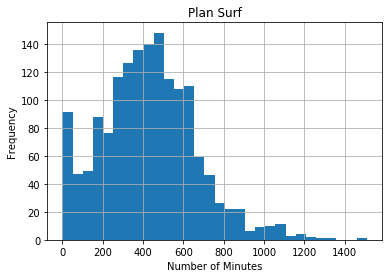

In [122]:
agg_megaline.loc[agg_megaline["plan"] == "surf", "number_of_min"].hist(bins = 30)

plt.xlabel("Number of Minutes")
plt.ylabel("Frequency")
plt.title("Plan Surf")

plt.show();

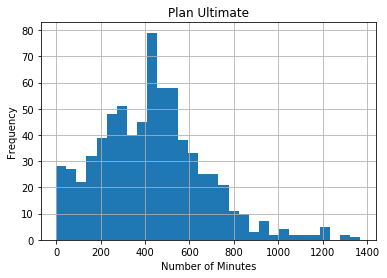

In [123]:
agg_megaline.loc[agg_megaline["plan"] == "ultimate", "number_of_min"].hist(bins = 30)

plt.xlabel("Number of Minutes")
plt.ylabel("Frequency")
plt.title("Plan Ultimate")
plt.show()

In [124]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

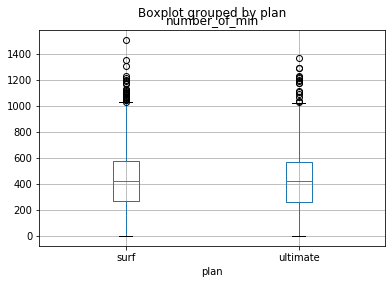

In [125]:
agg_megaline.boxplot(column='number_of_min', by='plan');

Median data points for both plans are quite close, they have lots of outlier with `surf` outliers above 1400.

Customers on plan `surf` on average talk 428 minutes, while those on `ultimate` use 430 minutes on calls. The standard deviation is lower for those on `surf` (234) compared to `ultimate` (240), meaning that that the there are less calls spread out over a large range of values. 

In [126]:
#Describe the customers behavior. 
#Find the texts the users of each plan require per month. 

agg_megaline.groupby(["plan", 'month'])["number_of_messages"].agg([np.mean, np.var, np.std])

mean          var        std
plan     month                                       
surf     April      17.400000   501.591837  22.396246
         August     28.777778  1029.515528  32.086064
         December   38.600629  1458.158612  38.185843
         February   12.000000   386.000000  19.646883
         January    10.500000   220.500000  14.849242
         July       27.033058   923.915565  30.395979
         June       25.298969   914.920103  30.247646
         March      15.260870   346.565217  18.616262
         May        24.012987   847.197198  29.106652
         November   32.385159  1065.344034  32.639608
         October    33.839662  1275.465708  35.713663
         September  30.762887  1003.829496  31.683268
ultimate April      22.047619   544.147619  23.326972
         August     38.478873  1196.367404  34.588544
         December   45.006623  1549.419956  39.362672
         February   21.571429   478.285714  21.869744
         January    15.500000   313.666667  17.710637
         July       32.830508   960.488019  30.991741
         June       29.340426   857.620722  29.285162
         March      20.250000   654.386364  25.580977
         May        32.103448  1297.310345  36.018195
         November   38.606299  1232.669166  35.109389
         October    39.443396  1221.106289  34.944331
         September  37.895349  1050.918331  32.417871

In [127]:
agg_megaline.groupby(["plan"])["number_of_messages"].agg([np.mean, np.var, np.std])

,mean,var,std
plan,,,
surf,31.159568,1126.724522,33.566717
ultimate,37.551389,1208.756744,34.767179


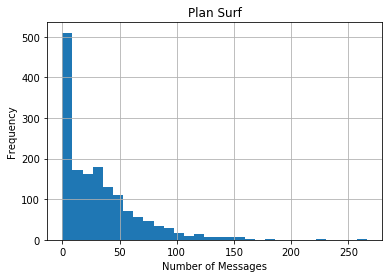

In [128]:
agg_megaline.loc[agg_megaline["plan"] == "surf", "number_of_messages"].hist(bins = 30)

plt.xlabel("Number of Messages")
plt.ylabel("Frequency")
plt.title("Plan Surf")

plt.show()

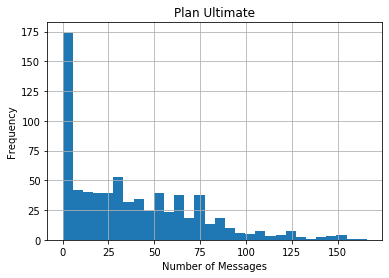

In [129]:
agg_megaline.loc[agg_megaline["plan"] == "ultimate", "number_of_messages"].hist(bins = 30)

plt.xlabel("Number of Messages")
plt.ylabel("Frequency")
plt.title("Plan Ultimate")

plt.show()

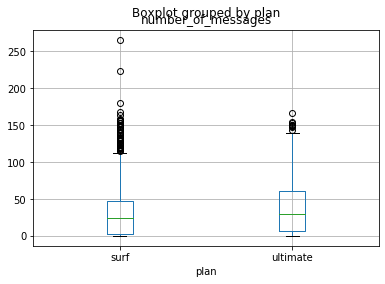

In [130]:
agg_megaline.boxplot(column='number_of_messages', by='plan');

The number of messages has wider range for `ultimate`, however, `surf` has more outliers spreaded far from the middle. 

Customers on plan surf on average send 31 messages, while those on ultimate send 37 messages. The standard deviation is quite higher for those on surf (1126) compared to ultimate (1208), meaning that that the there are customers spread out over a large range of values regarding the message they sent. 

In [131]:
#Describe the customers behavior. 
#Find the internet the users of each plan require per month. 

agg_megaline.groupby(["plan", 'month'])["mb_rounded"].agg([np.mean, np.var, np.std])

mean           var           std
plan     month                                              
surf     April      12513.280000  5.894666e+07   7677.673008
         August     17287.901235  7.489029e+07   8653.917339
         December   18676.729560  7.257283e+07   8518.968624
         February   12515.555556  4.345765e+07   6592.241635
         January     5120.000000  1.887437e+07   4344.464064
         July       17281.057851  6.446244e+07   8028.850308
         June       15856.164948  5.007198e+07   7076.155828
         March      13890.782609  6.709229e+07   8190.988080
         May        14455.688312  6.100985e+07   7810.880233
         November   16825.441696  5.726045e+07   7567.063739
         October    17827.105485  6.367566e+07   7979.703274
         September  17091.298969  5.163255e+07   7185.579457
ultimate April      16725.333333  9.000277e+07   9486.979147
         August     18273.352113  6.086678e+07   7801.716322
         December   18838.887417  6.169932e+07   7854.891655
         February   17700.571429  3.974602e+07   6304.444751
         January     7424.000000  1.564126e+07   3954.903117
         July       16887.322034  6.737545e+07   8208.255059
         June       15795.744681  7.220333e+07   8497.254448
         March      18858.666667  1.453628e+08  12056.650442
         May        17266.758621  5.682714e+07   7538.377628
         November   17528.944882  5.703278e+07   7552.005287
         October    18142.188679  5.725734e+07   7566.857804
         September  17419.906977  4.955432e+07   7039.483269

In [132]:
agg_megaline.groupby(["plan"])["mb_rounded"].agg([np.mean, np.var, np.std])

,mean,var,std
plan,,,
surf,17070.789574,6.457508e+07,8035.862417
ultimate,17722.311111,6.168830e+07,7854.190127


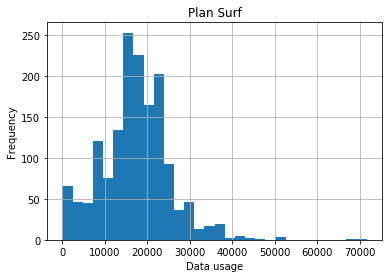

In [133]:
agg_megaline.loc[agg_megaline["plan"] == "surf", "mb_rounded"].hist(bins = 30)

plt.xlabel("Data usage")
plt.ylabel("Frequency")
plt.title("Plan Surf")

plt.show()

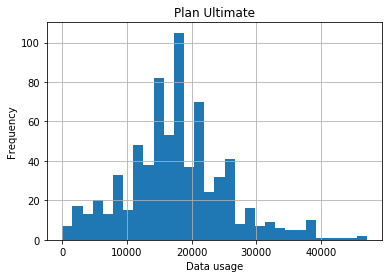

In [134]:
agg_megaline.loc[agg_megaline["plan"] == "ultimate", "mb_rounded"].hist(bins = 30)

plt.xlabel("Data usage")
plt.ylabel("Frequency")
plt.title("Plan Ultimate")

plt.show()

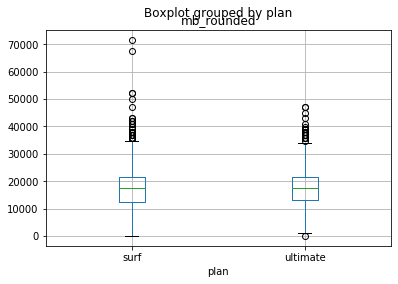

In [135]:
agg_megaline.boxplot(column='mb_rounded', by='plan');

From the boxplot above, we can see that on average, more data is spent on surf plan. Also, surf has data points that are positioned far away. This confirmed what is obsevred in the corresponding histograms above, as wellas the statistics calculted. 

Customers on plan `surf` on average use 170704 mb internet, while those on ultimate use 17722. The standard deviation is quite higher for those on surf (8035) compared to ultimate (7854), meaning that that the there are customers spread out over a large range of values regarding the internet they use.

###  Conclusion

In the above part of the analysis, we looked at the monthly spent minutes, texts, and volume of data for each plan. We also plotted the data on histograms and then boxplots to see outliers. We also calculated a few statistical measures in order to understand the distribution of the data. On average, `surf` has less calls made, less messages sent and less data surfed, and except for data used, for the other mesares used  also data spreaded across narrows ranges. `Ultimate` plan has a bit larger mean values for the same variables,  and more spreaded data points. 

## <a id='four'></a> Test the hypotheses ##

As H₀ is always stated with an equal sign, in our analysis we need to check that there’s no difference between average revenue generated by customers on different plans, and different regions.

typical alpha = 0.05

If p_value< alpha, then reject null hypothesis. 
If p_value > alpha, fail to reject null hypothesis.

In [136]:
agg_megaline_merge.groupby('plan')['total_cost'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,60.706408,55.388042,20.0,20.0,40.36,80.36,590.37
ultimate,720.0,72.313889,11.395108,70.0,70.0,70.00,70.00,182.00


In [137]:
# Shapiro-Wilk Test for ultimate plan
from scipy.stats import shapiro

stat, p = shapiro(agg_megaline_merge.loc[agg_megaline_merge['plan']=='ultimate', "total_cost"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.209, p=0.000
Sample does not look Gaussian (reject H0)


In [138]:
# Shapiro-Wilk Test for surf plan
from scipy.stats import shapiro

stat, p = shapiro(agg_megaline_merge.loc[agg_megaline_merge['plan']=='surf', "total_cost"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.735, p=0.000
Sample does not look Gaussian (reject H0)


We used, Shapiro-Wilk test to evaluate the data samples on revenue by plans and quantifies how likely it is that the data was drawn from a Gaussian distribution. In both cases, the data tested are not normally distributed. This means that in the next step, we should use Levene's test to test if these two samples have equal variances. 

In [139]:
#Levene's test centered at the median for the two plans
st.levene((agg_megaline_merge.loc[agg_megaline_merge['plan']=='surf', "total_cost"]),(agg_megaline_merge.loc[agg_megaline_merge['plan']=='ultimate', "total_cost"]) ,  center='median')

alpha = 0.05
print('The p-value is:' , p)
if p > alpha:
    print('The variance in the two plan samples is not significantly different. (fail to reject H0)')
else:
    print('The variance in the two plan samples is significantly different (reject H0)')

The p-value is: 1.5414283107572988e-44
The variance in the two plan samples is significantly different (reject H0)


The leven's test shows the two groups have no equal variances. When we are to perform t-test, we should specify this in the argument.

*Null hypothesis*: The average revenue from users of Ultimate and Surf calling plans is equal.

*Alternate hypothesis*: The average revenue from users of Ultimate and Surf calling plans is equal.

In [140]:
results_plan = st.ttest_ind(agg_megaline_merge.loc[agg_megaline_merge['plan']=='ultimate', "total_cost"], agg_megaline_merge.loc[agg_megaline_merge.plan=='surf', "total_cost"], axis=0, equal_var=False) 
alpha = .05

print('p-value: ', results_plan.pvalue)

if (results_plan.pvalue < alpha): 
    print("We reject the null hypothesis of identical average revenue from the two plans.")
else:
    print("We can't reject the null hypothesis  of identical average revenue from the two plans.")

p-value:  3.17039054811355e-15
We reject the null hypothesis of identical average revenue from the two plans.


In [141]:
#calculating the average revenue for each plan

surf = agg_megaline_merge.query('plan == "surf" ')
mean_surf = surf['total_cost'].mean()

ult = agg_megaline_merge.query('plan == "ultimate" ')
mean_ult = ult["total_cost"].mean()

In [142]:
print('The average revenue from plan surf is:', mean_surf)
print('The average revenue from plan ultimate is:', mean_ult)

The average revenue from plan surf is: 60.706408137317226
The average revenue from plan ultimate is: 72.31388888888888


In [143]:
# Shapiro-Wilk Test for New York-Newark-Jersey City, NY-NJ-PA MSA area
from scipy.stats import shapiro

stat, p = shapiro(agg_megaline_merge.loc[agg_megaline_merge['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA', "total_cost"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.828, p=0.000
Sample does not look Gaussian (reject H0)


In [144]:
# Shapiro-Wilk Test for rest of the area
from scipy.stats import shapiro

stat, p = shapiro(agg_megaline_merge.loc[agg_megaline_merge['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA', "total_cost"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.743, p=0.000
Sample does not look Gaussian (reject H0)


In [145]:
#Levene's test centered at the median for the two plans
st.levene((agg_megaline_merge.loc[agg_megaline_merge['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA', "total_cost"]),(agg_megaline_merge.loc[agg_megaline_merge['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA', "total_cost"]),  center='median')

alpha = 0.05
print('The p-value is:' , p)
if p > alpha:
    print('The variance in the two plan samples is not significantly different. (fail to reject H0)')
else:
    print('The variance in the two plan samples is significantly different (reject H0)')

The p-value is: 0.0
The variance in the two plan samples is significantly different (reject H0)


The Shapiro-Wilk test showed that the data samples on regions are likelt to not follow normal distribution. Based on this information, we perfomred Levene's test which showed that the variance of both samples is siatsically significant, which shows that in testing the hypothesis, we need to specify that the variance is not equal. 

In [146]:
results_region = st.ttest_ind(agg_megaline_merge.loc[agg_megaline_merge['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA', "total_cost"], agg_megaline_merge.loc[agg_megaline_merge.city!='New York-Newark-Jersey City, NY-NJ-PA MSA', "total_cost"], axis=0, equal_var=False)
alpha = .05

print('p-value: ', results_region.pvalue)
if (results_region.pvalue < alpha): 
    print("We reject the null hypothesis  of identical average revenue from the two regions.")
else:
    print("We can't reject the null hypothesis  of identical average revenue from the two regions.")

p-value:  0.03352561588530014
We reject the null hypothesis  of identical average revenue from the two regions.


*Null hypothesis*: The average revenue from usersin NY/NJ area is equal to that of the
users from other regions.

*Alternate hypothesis*: The average revenue from users in NY/NJ area is different from that of the
users from other regions.

Our analysis suggests that the revenue generated on the different plans differs, as well as the revenue generated from users in in different regions. 

In [147]:
#calculating the average revenue for each plan

NY = agg_megaline_merge.query('city=="New York-Newark-Jersey City, NY-NJ-PA MSA" ')
mean_NY = NY['total_cost'].mean()

other_region = agg_megaline_merge.query('city!="New York-Newark-Jersey City, NY-NJ-PA MSA" ')
mean_region = other_region["total_cost"].mean()

In [149]:
print('The average revenue from region NY is:', mean_NY)
print('The average revenue from other regions is:', mean_region)

The average revenue from region NY is: 59.921352785145885
The average revenue from other regions is: 65.2227713987474


## <a id='four'></a> Overall conclusion ##

**Brief overview of the work done:** For this project, we used techniques from statistical data analysis in order to see whether the revenue generated by customers differs across `plans` and across `regions`. We first uploaded the data, inspected for missing values, type of data and their size. We convereted the data in integer and datastamp types, and we created new columns to round up the minutes and data used. Then we porceeded with merging diffierent datatsets and grouping the data in order to get the number of messages, minutes and data used by each customer. Based on the usage, we calculated the revenue for each customer. The revenue comes from plan subsricitopn, revenue from cganges for messaged, minutes and data used that exceed the mountly allowance. In the end, we tested the hypothesis of whether the avregae revenue differs by plan or by region. 

**Main findings:** The main findings are that there is statistical difference (at 5% significance level) between revenue generatered by those on `ultimate` and customers on `surf` plan. Non significant differences  were found when it comes to region, as the analysis shows that the revenues do not depend on region. 

**Recommendations:** Advice to the company is to distribute its advertsiery budget on the `ultimate` plan, as it was showed to generate more revenue, as well as on other regions different than `New York-Newark-Jersey City, NY-NJ-PA MSA`, as more revenue is generated there.  